In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

In [8]:
import pandas as pd
data = np.hstack((X, y))
df = pd.DataFrame(data, columns=['X', 'y'])

In [9]:
df.head(3)

,X,y
0,-0.509347,1.224354
1,-0.688860,3.685348
2,-0.706086,1.220567


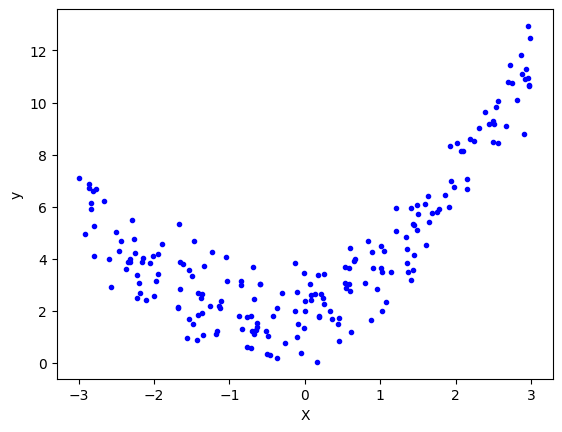

In [10]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [15]:
print(X_train[0])
print(X_train_trans[0]) # we have 1 input column and giving degree 2 so x^0=1 , x^1=[0.60445204],x^2=0.36536227

[0.60445204]
[1.         0.60445204 0.36536227]


In [ ]:
# include_bias parameter

In [16]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test_trans)

In [18]:
r2_score(y_test,y_pred)

0.8864217531753243

In [20]:
print(lr.coef_) #B^0 , B^1 ,B^2
print(lr.intercept_) #BIAS VALUE

[[0.         0.87835235 0.76000182]]
[2.10366888]


In [21]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

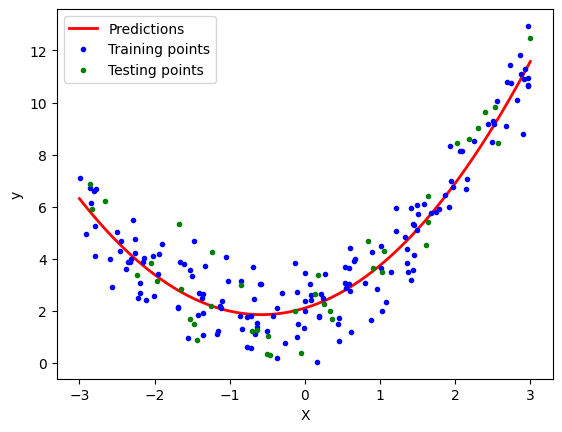

In [22]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()